# Project 1: Ames Housing EDA Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

To create a regression based model to predict the housing price using the Ames Housing Dataset.

[Link to data description](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)

## Executive Summary

Backstory behind the Ames housing data set


### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

*All libraries used should be added here*

In [1]:
#Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Set the graph style
plt.style.use('fivethirtyeight')

## Data Import and Cleaning

#### 1. Read In Data

Read in the`.csv` files

In [3]:
# Open the zzx CSV data files
train_df = pd.read_csv('../datasets/train.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe

In [4]:
# View first 10 rows
train_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

#### 3. Verbally Describe Data

Answer: 

The data set contains information from the Ames Assessor’s Office used in computing assessed values for individual residential properties sold in Ames, IA from *2006 to 2010*.

A total of **2930 observations** and **81 columns** can be found in the data set.

Variables are categorized into the following:
* 23 nominal, 
* 23 ordinal, 
* 14 discrete
* 20 continuous variables 
* 2 additional observation identifiers

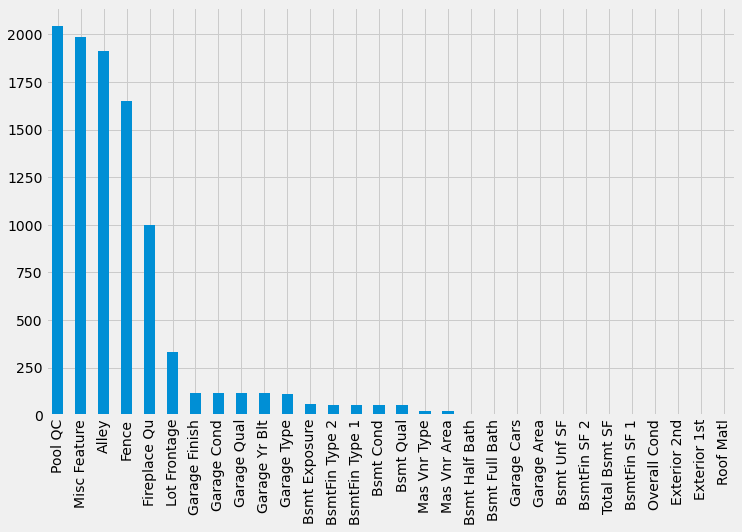

In [6]:
# Plotting missing values for the DataFrame
series_null = train_df.isnull().sum()
series_null.sort_values(ascending=False).head(30).plot(kind='bar', figsize=(11,7));

In [7]:
# Missing values for the variables
series_null[series_null > 1].sort_values(ascending=False).index

Index(['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu',
       'Lot Frontage', 'Garage Yr Blt', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Garage Type', 'Bsmt Exposure', 'BsmtFin Type 2',
       'BsmtFin Type 1', 'Bsmt Cond', 'Bsmt Qual', 'Mas Vnr Area',
       'Mas Vnr Type', 'Bsmt Half Bath', 'Bsmt Full Bath'],
      dtype='object')

In [8]:
# Define a funtion to check the percentage of missing values
def pct_missing_value(data,col):
    missing_dict = dict()
    for c in col:
        missing_dict[c] = round((data[c].isnull().sum() / len(data[c])) * 100,2)
    return missing_dict

In [9]:
dict_missing = pct_missing_value(train_df,['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu',
       'Lot Frontage', 'Garage Yr Blt', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Garage Type', 'Bsmt Exposure', 'BsmtFin Type 2',
       'BsmtFin Type 1', 'Bsmt Cond', 'Bsmt Qual', 'Mas Vnr Area',
       'Mas Vnr Type', 'Bsmt Half Bath', 'Bsmt Full Bath'])
dict_missing

{'Pool QC': 99.56,
 'Misc Feature': 96.83,
 'Alley': 93.17,
 'Fence': 80.5,
 'Fireplace Qu': 48.76,
 'Lot Frontage': 16.09,
 'Garage Yr Blt': 5.56,
 'Garage Finish': 5.56,
 'Garage Qual': 5.56,
 'Garage Cond': 5.56,
 'Garage Type': 5.51,
 'Bsmt Exposure': 2.83,
 'BsmtFin Type 2': 2.73,
 'BsmtFin Type 1': 2.68,
 'Bsmt Cond': 2.68,
 'Bsmt Qual': 2.68,
 'Mas Vnr Area': 1.07,
 'Mas Vnr Type': 1.07,
 'Bsmt Half Bath': 0.1,
 'Bsmt Full Bath': 0.1}

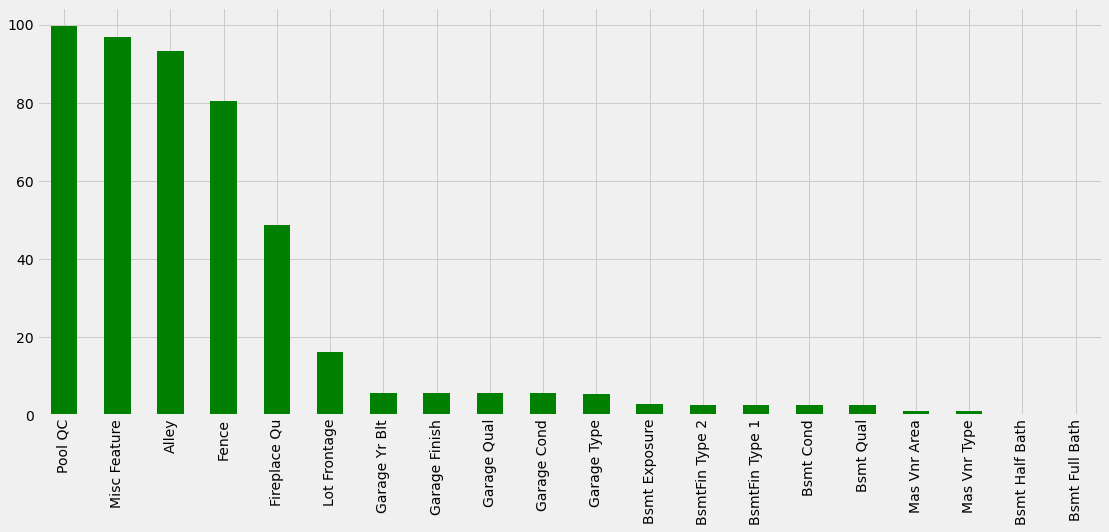

In [10]:
missing_data_pct = pd.Series(dict_missing)
missing_data_pct.plot(kind='bar', figsize=(17,7), color='green');

Top missing values in the data set, **drop the columns with percentages greater than 15%**

These features need to be dropped: *'Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu','Lot Frontage'*

In [11]:
train_df = train_df.drop(['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu','Lot Frontage'], axis=1)

In [99]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 73 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2051 non-null   int64  
 1   MS Zoning        2051 non-null   object 
 2   Lot Area         2051 non-null   int64  
 3   Street           2051 non-null   object 
 4   Lot Shape        2051 non-null   object 
 5   Land Contour     2051 non-null   object 
 6   Utilities        2051 non-null   object 
 7   Lot Config       2051 non-null   object 
 8   Land Slope       2051 non-null   object 
 9   Neighborhood     2051 non-null   object 
 10  Condition 1      2051 non-null   object 
 11  Condition 2      2051 non-null   object 
 12  Bldg Type        2051 non-null   object 
 13  House Style      2051 non-null   object 
 14  Overall Qual     2051 non-null   int64  
 15  Overall Cond     2051 non-null   int64  
 16  Year Built       2051 non-null   int64  
 17  Year Remod/Add

In [13]:
# Columns to drop: 'Id', 'PID', no correlation with price

train_df = train_df.drop(['Id', 'PID'], axis=1) 
train_df.head()

,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,60,RL,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,...,44,0,0,0,0,0,3,2010,WD,130500
1,60,RL,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,...,74,0,0,0,0,0,4,2009,WD,220000
2,20,RL,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,52,0,0,0,0,0,1,2010,WD,109000
3,60,RL,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,...,0,0,0,0,0,0,4,2010,WD,174000
4,50,RL,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,...,59,0,0,0,0,0,3,2010,WD,138500


In [113]:
# Select the numeric values with int64, float64
train_df_num = train_df.select_dtypes(['int64', 'float64']).drop(['Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Yr Sold'], axis=1).copy()
train_df_num.head()

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,SalePrice
0,60,13517,6,8,289.0,533.0,0.0,192.0,725.0,725,...,475.0,0,44,0,0,0,0,0,3,130500
1,60,11492,7,5,132.0,637.0,0.0,276.0,913.0,913,...,559.0,0,74,0,0,0,0,0,4,220000
2,20,7922,5,7,0.0,731.0,0.0,326.0,1057.0,1057,...,246.0,0,52,0,0,0,0,0,1,109000
3,60,9802,5,5,0.0,0.0,0.0,384.0,384.0,744,...,400.0,100,0,0,0,0,0,0,4,174000
4,50,14235,6,8,0.0,0.0,0.0,676.0,676.0,831,...,484.0,0,59,0,0,0,0,0,3,138500


In [114]:
# Select the datetime values, the years
train_df_date = train_df[['Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Yr Sold']].copy()
train_df_date.head()

,Year Built,Year Remod/Add,Garage Yr Blt,Yr Sold
0,1976,2005,1976.0,2010
1,1996,1997,1997.0,2009
2,1953,2007,1953.0,2010
3,2006,2007,2007.0,2010
4,1900,1993,1957.0,2010


To change to datetime: Year Built, Year Remod/Add, Garage Yr Blt, Yr Sold

**Garage Yr Blt** is a float dtype, it has 114 NA values. 

In [117]:
# Select the categorical variables
train_df_cat = train_df.select_dtypes(['object']).copy()
train_df_cat.head()

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,...,Central Air,Electrical,Kitchen Qual,Functional,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type
0,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,...,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD
1,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,...,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD
2,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD
3,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,...,Y,SBrkr,TA,Typ,BuiltIn,Fin,TA,TA,Y,WD
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,...,Y,SBrkr,TA,Typ,Detchd,Unf,TA,TA,N,WD


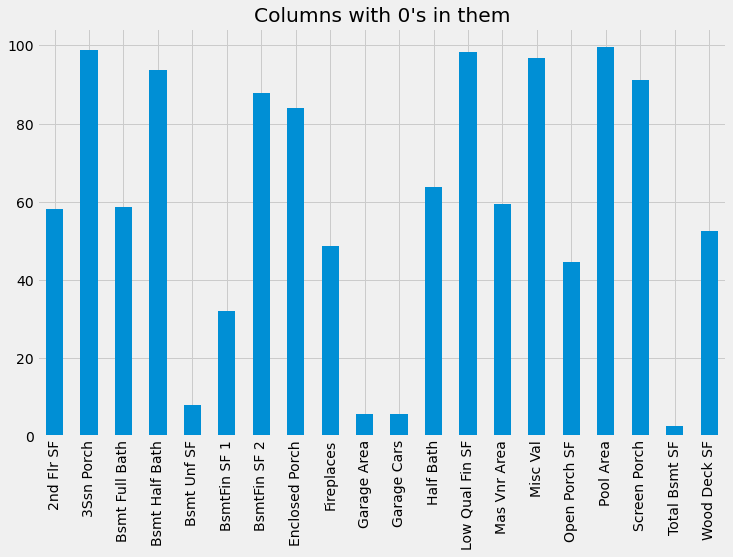

In [104]:
# Count the columns with values with 0's in them
train_df_int = train_df.select_dtypes(include=['int64', 'float']).copy()
train_df_with_0 = ((train_df_int.isin([0]).sum() / len(train_df_int)) * 100).sort_values(ascending=False).iloc[:-16]

train_df_with_0.sort_index(ascending=True).plot(kind='bar', 
                                                  figsize=(11,7), title='Columns with 0\'s in them');

In [78]:
train_df_with_0

Pool Area          99.561190
3Ssn Porch         98.732326
Low Qual Fin SF    98.391029
Misc Val           96.830814
Bsmt Half Bath     93.759142
Screen Porch       91.175037
BsmtFin SF 2       87.908337
Enclosed Porch     84.056558
Half Bath          63.773769
Mas Vnr Area       59.288152
Bsmt Full Bath     58.508045
2nd Flr SF         58.069235
Wood Deck SF       52.413457
Fireplaces         48.756704
Open Porch SF      44.466114
BsmtFin SF 1       32.033155
Bsmt Unf SF         8.044856
Garage Cars         5.509508
Garage Area         5.509508
Total Bsmt SF       2.632862
dtype: float64

In [91]:
# Find the correlation for features will 0's in them with SalePrice
train_df_with_0 = pd.concat([train_df[train_df_with_0.index],train_df['SalePrice']],axis=1)
train_df_with_0.head()

,Pool Area,3Ssn Porch,Low Qual Fin SF,Misc Val,Bsmt Half Bath,Screen Porch,BsmtFin SF 2,Enclosed Porch,Half Bath,Mas Vnr Area,...,2nd Flr SF,Wood Deck SF,Fireplaces,Open Porch SF,BsmtFin SF 1,Bsmt Unf SF,Garage Cars,Garage Area,Total Bsmt SF,SalePrice
Pool Area,1.000000,-0.006522,-0.006854,0.017661,0.066097,0.033114,0.061026,-0.015636,0.001294,0.012422,...,0.012642,0.128373,0.107769,0.073965,0.075925,-0.039209,0.021566,0.045876,0.061503,0.023106
3Ssn Porch,-0.006522,1.000000,-0.003461,-0.004887,0.030571,-0.029574,-0.024225,-0.032145,-0.027131,0.011161,...,-0.033167,-0.010851,0.026411,-0.007336,0.047719,0.020409,0.028393,0.043918,0.060283,0.048732
Low Qual Fin SF,-0.006854,-0.003461,1.000000,-0.005756,-0.027237,0.014218,-0.002764,0.089883,-0.041452,-0.061878,...,0.014645,-0.017246,-0.001850,-0.006253,-0.078362,0.059575,-0.080990,-0.071190,-0.022449,-0.041594
Misc Val,0.017661,-0.004887,-0.005756,1.000000,0.050212,0.007122,-0.005515,0.015049,0.055789,0.079219,...,0.004413,0.085091,0.023372,0.109919,0.130042,-0.005888,0.003053,0.033641,0.125600,-0.007375
Bsmt Half Bath,0.066097,0.030571,-0.027237,0.050212,1.000000,0.037595,0.093908,-0.012093,-0.047309,0.010220,...,-0.068366,0.031754,0.061520,-0.032635,0.077500,-0.109729,-0.032965,-0.024987,0.005404,-0.045328
Screen Porch,0.033114,-0.029574,0.014218,0.007122,0.037595,1.000000,0.096405,-0.069049,0.046712,0.086631,...,0.035105,-0.067770,0.167071,0.059027,0.093226,-0.055558,0.053582,0.071067,0.076061,0.134581
BsmtFin SF 2,0.061026,-0.024225,-0.002764,-0.005515,0.093908,0.096405,1.000000,0.004540,-0.016473,-0.016756,...,-0.087505,0.105836,0.067976,-0.004382,-0.050249,-0.231330,-0.002129,0.013190,0.086545,0.016255
Enclosed Porch,-0.015636,-0.032145,0.089883,0.015049,-0.012093,-0.069049,0.004540,1.000000,-0.100591,-0.107104,...,0.021083,-0.114079,0.009368,-0.077019,-0.076963,-0.010847,-0.139608,-0.112353,-0.088055,-0.135656
Half Bath,0.001294,-0.027131,-0.041452,0.055789,-0.047309,0.046712,-0.016473,-0.100591,1.000000,0.192687,...,0.614656,0.125241,0.203252,0.181469,-0.006742,-0.042559,0.231874,0.177438,-0.055104,0.283001
Mas Vnr Area,0.012422,0.011161,-0.061878,0.079219,0.010220,0.086631,-0.016756,-0.107104,0.192687,1.000000,...,0.100568,0.163584,0.269104,0.163489,0.321807,0.085853,0.361211,0.384718,0.408575,0.512230


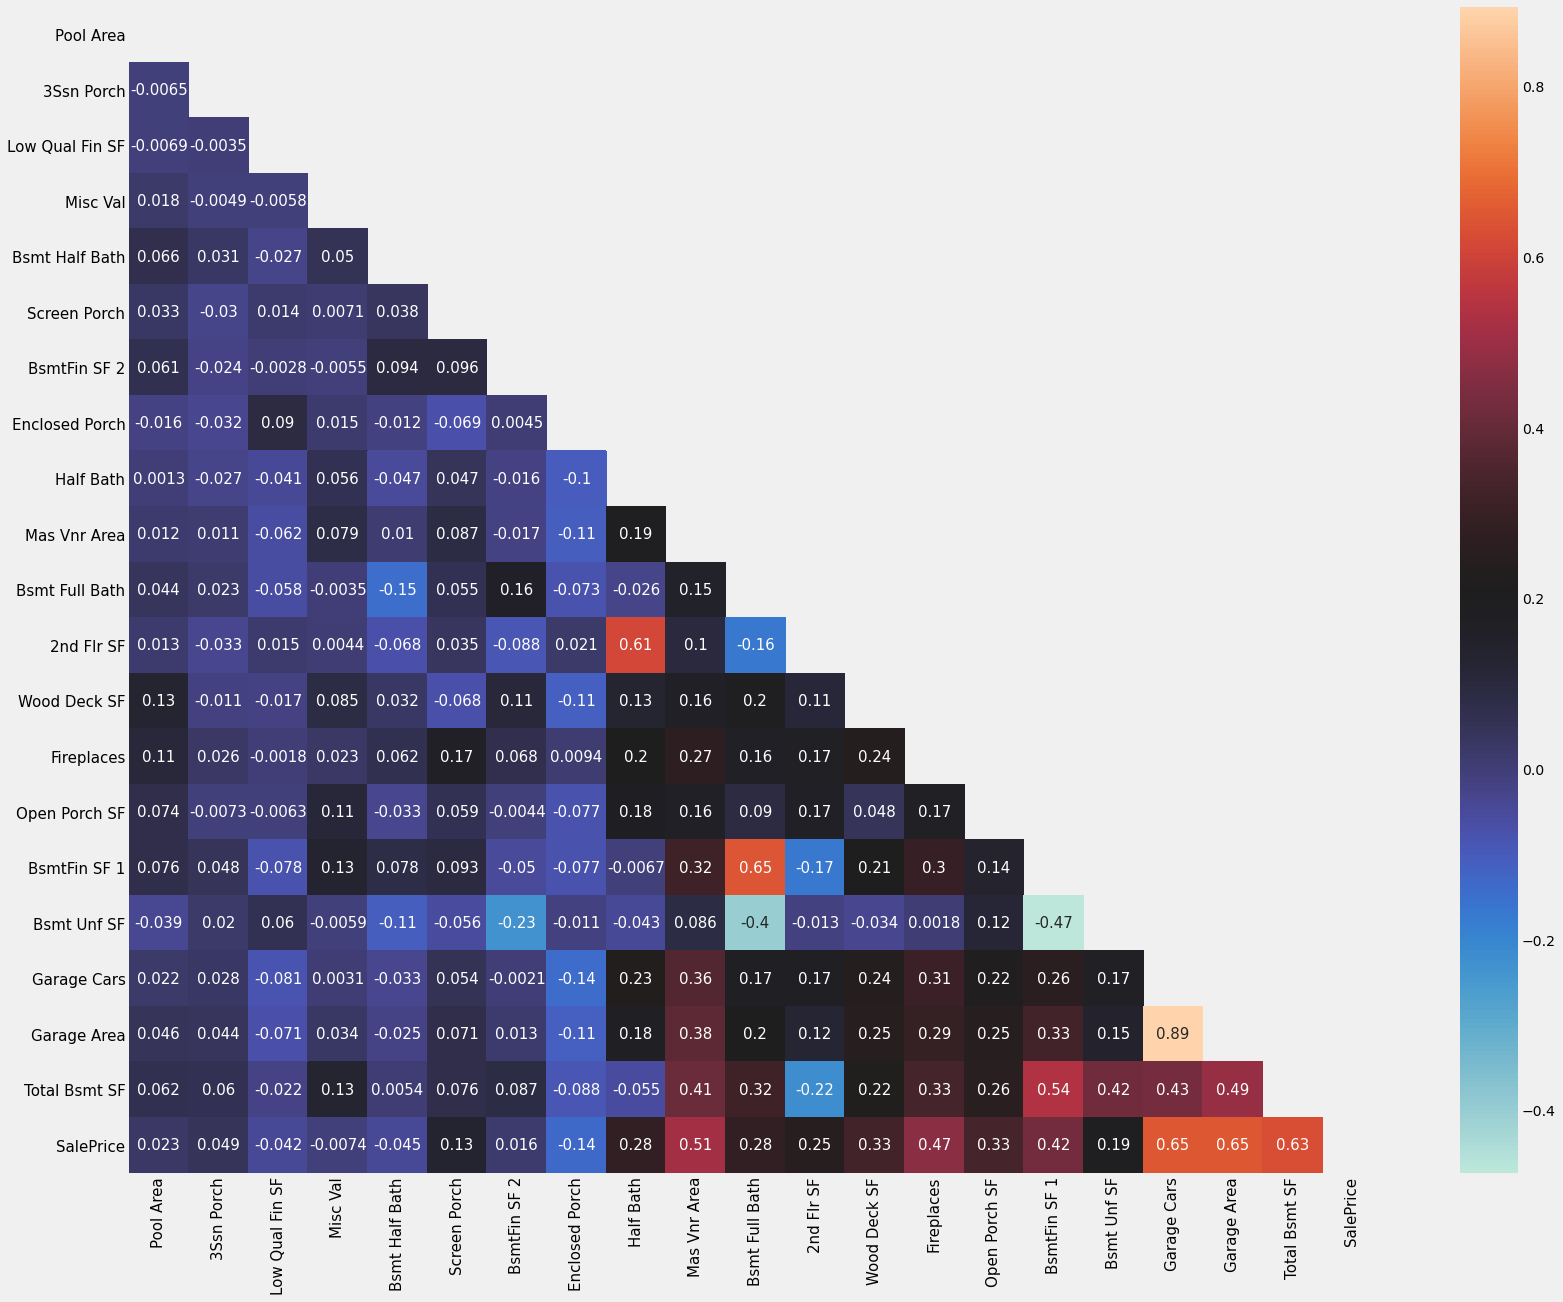

In [101]:
# Heatmap correlation of columns with 0's with SalePrice
mask = np.zeros_like(train_df_with_0.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(25,20))

sns.heatmap(train_df_with_0.corr(), annot=True, mask=mask, cmap='icefire', annot_kws={'fontsize':15})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

Based on the correlation heatmap, the following columns with a lot of 0's in them have **no correlation with price**:
* Pool Area
* 3Ssn Porch
* Low Qual Fin SF
* Misc Val
* Bsmt Half Bath
* Screen Porch (But it has a value of correlation of 0.134581, 85% with 0's)
* BsmtFin SF 2
* Enclosed Porch (But it has a value of correlation of -0.135656, 83% with 0's)
* Half Bath (60% with 0's)
* 


In [19]:
train_df_with_0.sort_values(ascending=False).index

Index(['Pool Area', '3Ssn Porch', 'Low Qual Fin SF', 'Misc Val',
       'Bsmt Half Bath', 'Screen Porch', 'BsmtFin SF 2', 'Enclosed Porch',
       'Half Bath', 'Mas Vnr Area', 'Bsmt Full Bath', '2nd Flr SF',
       'Wood Deck SF', 'Fireplaces', 'Open Porch SF', 'BsmtFin SF 1',
       'Bsmt Unf SF', 'Garage Cars', 'Garage Area', 'Total Bsmt SF',
       'Full Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Year Remod/Add',
       'Year Built', 'Overall Qual', 'Lot Area', 'Overall Cond', 'SalePrice',
       '1st Flr SF', 'Gr Liv Area', 'Yr Sold', 'TotRms AbvGrd',
       'Garage Yr Blt', 'Mo Sold', 'MS SubClass'],
      dtype='object')

Decided to drop columns with percentages greater than 30% as there are too many 0's in their columns and it'll not make sense for the model .

In [104]:
# Drop the columns with the most 0's
train_df = train_df.drop(['Pool Area', '3Ssn Porch', 'Low Qual Fin SF', 'Misc Val',
       'Bsmt Half Bath', 'Screen Porch', 'BsmtFin SF 2', 'Enclosed Porch',
       'Half Bath', 'Mas Vnr Area', 'Bsmt Full Bath', '2nd Flr SF',
       'Wood Deck SF', 'Fireplaces', 'Open Porch SF', 'BsmtFin SF 1'], axis=1)
train_df.head()

In [105]:
train_df

,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,...,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Mo Sold,Yr Sold,Sale Type,SalePrice
0,60,RL,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,...,RFn,2.0,475.0,TA,TA,Y,3,2010,WD,130500
1,60,RL,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,...,RFn,2.0,559.0,TA,TA,Y,4,2009,WD,220000
2,20,RL,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,Unf,1.0,246.0,TA,TA,Y,1,2010,WD,109000
3,60,RL,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,...,Fin,2.0,400.0,TA,TA,Y,4,2010,WD,174000
4,50,RL,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,...,Unf,2.0,484.0,TA,TA,N,3,2010,WD,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,20,RL,11449,Pave,IR1,HLS,AllPub,Inside,Gtl,Timber,...,Fin,2.0,520.0,TA,TA,Y,1,2008,WD,298751
2047,30,RL,12342,Pave,IR1,Lvl,AllPub,Inside,Gtl,Edwards,...,Unf,2.0,539.0,TA,TA,Y,3,2009,WD,82500
2048,50,RL,7558,Pave,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,...,Unf,2.0,342.0,Fa,Fa,Y,3,2009,WD,177000
2049,20,RL,10400,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,...,Unf,1.0,294.0,TA,TA,Y,11,2009,WD,144000


### Drop the outliers with square feet of over 4000

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

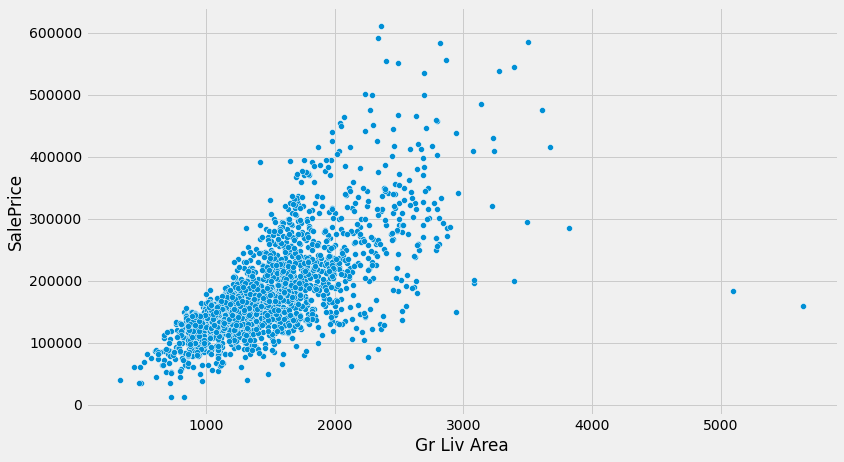

In [27]:
# Plotting the Gr Live Area with Sale price
plt.figure(figsize=(12,7))
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=train_df)

In [29]:
# Rows with Above Grade Living Area Square Ft, drop them as they're outliers
train_df['Gr Liv Area'][train_df['Gr Liv Area'] > 4000]

960     5642
1885    5095
Name: Gr Liv Area, dtype: int64

#### 4a. Does the data look complete? 

Answer: There are some missing values in the dataset. *Dropping it would be a consideration*. But, further analysis needs to be conducted

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each attributes? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:

## Variable Minimum scores and maximum scores

In [6]:
train_df.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


The minimum and maximum scores for ERW is correct.

The minimum score for sat_2017 math is 52, but the range is between 468 ~ 651, based on the pdf file the **correct value should be 524**.

In [134]:
sat_2017['Math'].describe()

count     51.000000
mean     547.627451
std       84.909119
min       52.000000
25%      522.000000
50%      548.000000
75%      599.000000
max      651.000000
Name: Math, dtype: float64

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

#### 5. What are your data types? 
Display the data types of each feature. 

In [149]:
#code
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [150]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     float64
dtypes: float64(5), object(2)
memory usage: 3.0+ KB


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: 

For xxx, participation should be a float type not object

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

## Transforming xxx attribute into xxx type

In [151]:
#code
# sat_2017['Participation'] = sat_2017['Participation'].apply(lambda i:float(i.replace('%','')))
# sat_2017['Participation']

0       5.0
1      38.0
2      30.0
3       3.0
4      53.0
5      11.0
6     100.0
7     100.0
8     100.0
9      83.0
10     61.0
11     55.0
12     93.0
13      9.0
14     63.0
15      2.0
16      4.0
17      4.0
18      4.0
19     95.0
20     69.0
21     76.0
22    100.0
23      3.0
24      2.0
25      3.0
26     10.0
27      3.0
28     26.0
29     96.0
30     70.0
31     11.0
32     67.0
33     49.0
34      2.0
35     12.0
36      7.0
37     43.0
38     65.0
39     71.0
40     50.0
41      3.0
42      5.0
43     62.0
44      3.0
45     60.0
46     65.0
47     64.0
48     14.0
49      3.0
50      3.0
Name: Participation, dtype: float64

In [152]:
sat_2017['Participation'].dtype

dtype('float64')

- Fix any individual values preventing other columns from being the appropriate type.

- Finish your data modifications by making sure the columns are now typed appropriately.

- Display the data types again to confirm they are correct.

In [155]:
#Code:
xxx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               51 non-null     object 
 1   Participation                       51 non-null     float64
 2   Evidence-Based Reading and Writing  51 non-null     int64  
 3   Math                                51 non-null     int64  
 4   Total                               51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [156]:
xxx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     float64
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     float64
dtypes: float64(6), object(1)
memory usage: 3.0+ KB


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

## Changing the column names for xxx

Change them to sat_17_participation, sat_17_evidenced_based_reading_writing, sat_17_math, sat_17_total

First change all to lower case

In [157]:
#code
# sat_2017 = sat_2017.rename(str.lower, axis='columns')
# sat_2017.head()

,state,participation,evidence-based reading and writing,math,total
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055


In [158]:
xxx.columns

Index(['state', 'participation', 'evidence-based reading and writing', 'math',
       'total'],
      dtype='object')

In [159]:
# sat_2017 = sat_2017.rename(columns={k:"sat_17_"+k for k in sat_2017.columns[1:]}) # Run once only, if not it'll duplicate
# sat_2017.head()

,state,sat_17_participation,sat_17_evidence-based reading and writing,sat_17_math,sat_17_total
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055


In [160]:
# sat_2017 = sat_2017.rename(columns={"sat_17_evidence-based reading and writing": "sat_17_erw"})
# sat_2017.head()

,state,sat_17_participation,sat_17_erw,sat_17_math,sat_17_total
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055


In [162]:
act_2017 = act_2017.rename(str.lower, axis='columns')
act_2017.head()

,state,participation,english,math,reading,science,composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


In [163]:
act_2017 = act_2017.rename(columns={k:"act_17_"+k for k in act_2017.columns[1:]})
act_2017.head()

,state,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**|

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|SAT|State of the data| 
|sat_17_participation|float|SAT|State participation rate in 2017|
|sat_17_erw|integer|SAT|State average Evidence-Based Reading and Writing score in 2017|
|sat_17_math|integer|SAT|State average Math score in 2017|
|sat_17_total|integer|SAT|State average Total score in 2017|
|state|object|ACT|State of the data|
|act_17_participation|float|ACT|State participation rate in 2017|
|act_17_english|float|ACT|State average English score in 2017|
|act_17_math|float|ACT|State average Math score in 2017|
|act_17_reading|float|ACT|State average Reading score in 2017|
|act_17_science|float|ACT|State average Science score in 2017|
|act_17_composite|float|ACT|State average Composite score in 2017|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [166]:
# Need to remove index 0 as it's the national aggregate
act_2017.head()

,state,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


In [167]:
act_2017 = act_2017.drop(0, axis='index')
act_2017.head()

,state,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4
5,California,31.0,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [170]:
#Code:
combined_2017 = sat_2017.merge(act_2017,on='state')
combined_2017.head()

,state,sat_17_participation,sat_17_erw,sat_17_math,sat_17_total,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.7
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.4
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [171]:
#code
# combined_2017.to_csv('../data/combined_2017.csv')

In [186]:
def add_underscore_char(words,test_name='test'):
    '''
    This function will covert the strings to lower case and add the test and year
    names to the column
    '''
    new_dict = dict()
    for word in words:
        lst = [w.lower() for w in word.split()]
        if len(lst) > 1:
            if lst[0] == 'percentage':
                new_dict[word] = test_name + "participation"
            elif lst[0] == 'average':
                new_dict[word] = test_name + lst[1]
            else:
                new_dict[word] = test_name+"_".join(lst)
        else:
            new_dict[word] = word.lower()
    return new_dict
            
add_underscore_char(act_2018.columns,"act_18_")

{'State': 'state',
 'Percentage of Students Tested': 'act_18_participation',
 'Average Composite Score': 'act_18_composite',
 'Average English Score': 'act_18_english',
 'Average Math Score': 'act_18_math',
 'Average Reading Score': 'act_18_reading',
 'Average Science Score': 'act_18_science'}

In [193]:
final_sat_act.to_csv('../data/final.csv')

Update the data dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|final.csv|State of the data| 
|sat_17_participation|float|final.csv|State participation rate in 2017|
|sat_17_erw|integer|final.csv|State average Evidence-Based Reading and Writing score in 2017|
|sat_17_math|integer|final.csv|State average Math score in 2017|
|sat_17_total|integer|final.csv|State average Total score in 2017|
|act_17_participation|float|final.csv|State participation rate in 2017|
|act_17_english|float|final.csv|State average English score in 2017|
|act_17_math|float|final.csv|State average Math score in 2017|
|act_17_reading|float|final.csv|State average Reading score in 2017|
|act_17_science|float|final.csv|State average Science score in 2017|
|act_17_composite|float|final.csv|State average Composite score in 2017|
|sat_18_participation|float|final.csv|State participation rate in 2018|
|sat_18_erw|integer|final.csv|State average Evidence-Based Reading and Writing score in 2018|
|sat_18_math|integer|final.csv|State average Math score in 2018|
|sat_18_total|integer|final.csv|State average Total score in 2018|
|act_18_participation|float|final.csv|State participation rate in 2018|
|act_18_english|float|final.csv|State average English score in 2018|
|act_18_math|float|final.csv|State average Math score in 2018|
|act_18_reading|float|final.csv|State average Reading score in 2018|
|act_18_science|float|final.csv|State average Science score in 2018|
|act_18_composite|float|final.csv|State average Composite score in 2018|

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [194]:
final_sat_act.describe().T

,count,mean,std,min,25%,50%,75%,max
sat_17_participation,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat_17_erw,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat_17_math,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat_17_total,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
act_17_participation,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act_17_english,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act_17_math,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act_17_reading,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act_17_science,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
act_17_composite,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

## In Summary

**SAT tests**

The participation rate for SAT increases significantly for **Colorado** from 11% in 2017 to 100%. This also lead to a decrease in test scores for SAT.

The other states do not differ as much.

**Illinois** has a large increase in SAT participation with a 1000% increase in sat participation from 2017 to 2018


**ACT tests**

**Colorado** faced the biggest decline in participation rates of act 100% in 2017 to 30% in 2018.

Largest increase in participation rate for **Ohio** with about 33% increase in participation rates


**Do any states show have >50% participation on both tests either year?**

Only 3 states, Florida, Georgia and Hawaii showed more than 50% participation rates in both tests and years.

This shows that most students will take either 1 of the tests due to either time or financial constraints.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

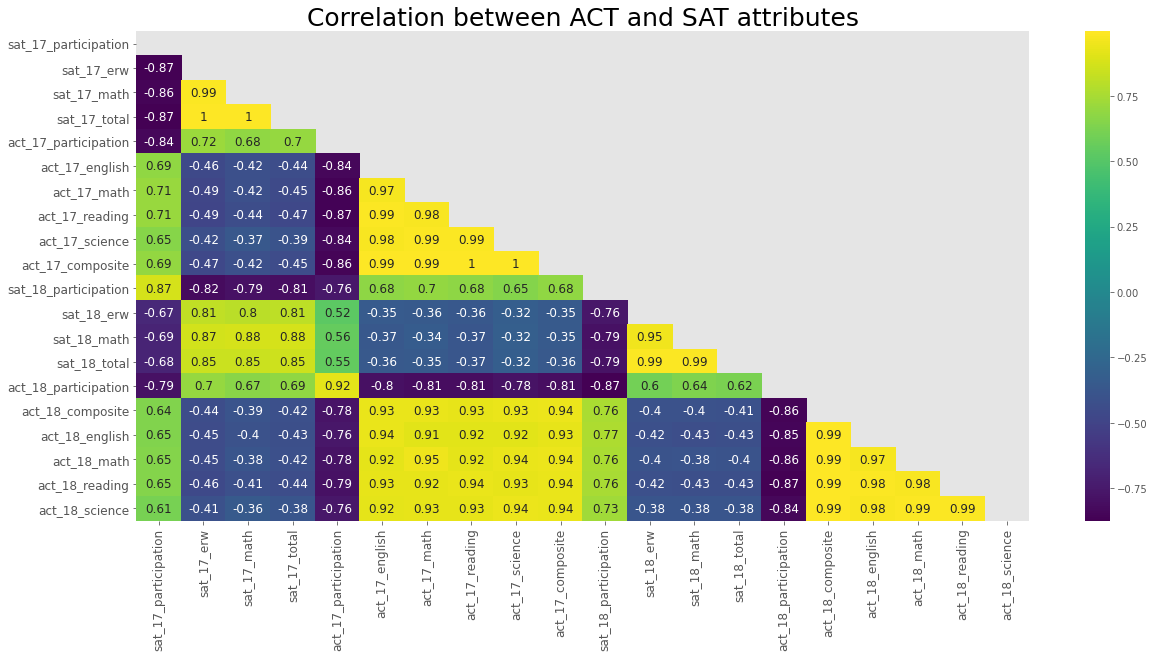

In [228]:
# mask = np.zeros_like(df.corr())
# mask[np.triu_indices_from(mask)] = True

# plt.figure(figsize=(20,9))
# sns.heatmap(df.corr(),cmap='viridis',annot=True, mask = mask, annot_kws={'size':12})
# plt.title('Correlation between xxx and yyy attributes', fontsize=25)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)

# plt.show()

From the heatmap, there's high negative correlation between SAT and ACT participation rate with -84% in 2017 and -85% in 2018. This translates to states with high SAT participation rates are more likely to have low ACT participation rates, vice versa.

There's an interesting correlation between the score and participation rates. For SAT, the correlation between average total score and participation was -87% in 2017 and -79% in 2018. For ACT, the correlations were -86% in 2017 and -86% in 2018. This shows that the higher the participation, the lower the average total score. This is likely due to students who show greater interest taking the test in cases of low participation and the scores being lower for cases in high participation as the range of student skills become wider.



#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [229]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels = None, bins=8, sup_title=None,lw=2):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    if len(list_of_columns) > 2:
        figsize=(15,14)
    else:
        figsize=(11,7)
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=figsize) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    fig.suptitle(sup_title, fontsize=20)
    
    # Calculating Mean, Median and Mode
    mean = dataframe[list_of_columns].mean()
    median = dataframe[list_of_columns].median()
    mode = dataframe[list_of_columns].mode().min()
    
    
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        color_lst = ['green', 'red', 'purple', 'yellow']
        #ax[i].hist(dataframe[column],bins=8, color=color) # feel free to add more settings
        sns.histplot(x=dataframe[column], data=dataframe, bins=bins, color = color_lst[i], ax=ax[i])
        # Set titles, labels, etc here for each subplot
        
        # Plotting the Axes vline
        ax[i].axvline(mean[i], color='magenta', label='mean', lw=lw)
        ax[i].axvline(median[i], color='blue', label='median', lw=lw)
        ax[i].axvline(mode[i], color='black', label='mode', lw=lw)
        
        ax[i].set_title(list_of_titles[i], fontsize=15)
        ax[i].set_xlabel(list_of_xlabels, fontsize=15)
        ax[i].set_ylabel('State Count')
        ax[i].legend(['Mean', 'Median', 'Mode'])

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

## Plotting the participation rates for SAT and ACT 2017 and 2018

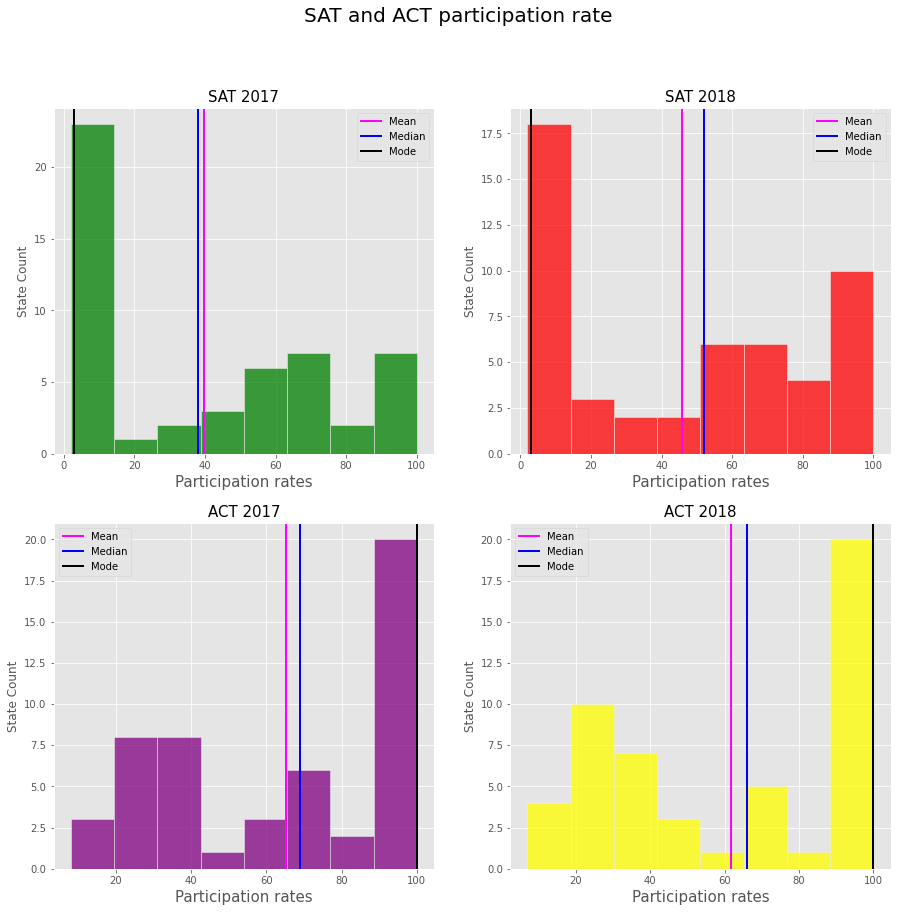

In [231]:
subplot_histograms(final_sat_act, ['sat_17_participation', 'sat_18_participation', 'act_17_participation', 'act_18_participation'],
                   ['SAT 2017', 'SAT 2018', 'ACT 2017', 'ACT 2018'], 'Participation rates', 
                   sup_title='SAT and ACT participation rate')

In [232]:
final_sat_act[['act_17_participation', 'act_18_participation']].agg(['mean', 'median'])

,act_17_participation,act_18_participation
mean,65.254902,61.647059
median,69.000000,66.000000


Most of the participation rate is between **0-10%** for **SAT**.

There seems to be about **25%** increase in SAT participation from 2017 to 2018 judging from the *mean values*.

Participation rate for **ACT** is much higher compared to SAT. Also, the participation rates do not differ as much year to year.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [243]:
def lmplots(dataframe, x, y, title, xlabel = None, ylabel = None):    
    sns.lmplot(x=x, y=y, data=dataframe, aspect=2, height=6, ci=None, scatter_kws={'color':'darkred'}, line_kws={'color':'green'})
        # Set titles, labels, etc here for each subplot
    plt.title(title, fontsize=15, pad=15)
#     plt.xticks(ticks=np.arange(450,700,25), labels=[str(x) for x in np.arange(450,700,25)])
    plt.xlabel(xlabel, fontsize=12, labelpad=20)
    plt.ylabel(ylabel, fontsize=12, labelpad=20)

## SAT and ACT 2017 math scores

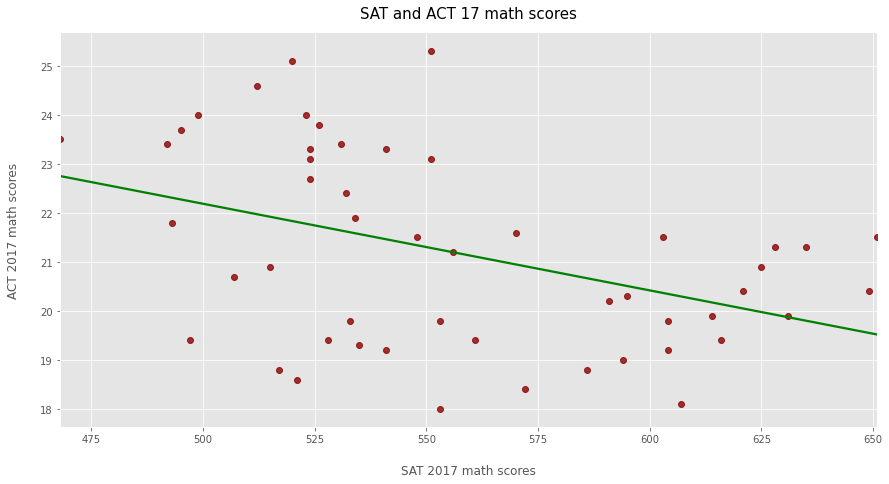

In [245]:
lmplots(final_sat_act, 'sat_17_math', 'act_17_math', 
        'SAT and ACT 17 math scores', 'SAT 2017 math scores', 
        'ACT 2017 math scores')

The scatter points are dispersed and a negative line of best fit is plotted. This shows a negative weak correlation between the variables.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

## SAT and ACT participation box plots

In [253]:
def boxplots(dataframe, title, xlabel = None, yticklabels = None, palette='coolwarm'):    
    plt.figure(figsize=(11,7))
    sns.boxplot(data=dataframe, orient='h', palette=palette, width=0.5)
        # Set titles, labels, etc here for each subplot
    plt.title(title, fontsize=20, pad=15)
    plt.xlabel(xlabel, labelpad=20, fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(ticks=[tick for tick in range(len(dataframe.columns))], labels= yticklabels, fontsize=15)
    plt.show()

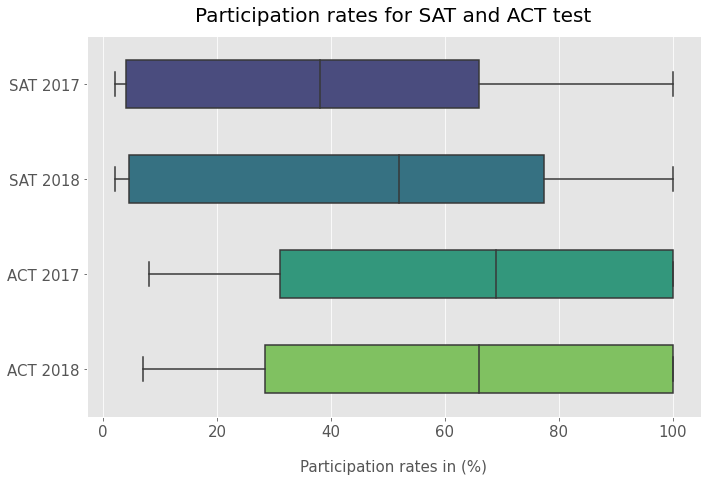

In [254]:
all_part = final_sat_act[['sat_17_participation', 'sat_18_participation', 'act_17_participation', 'act_18_participation']]
boxplots(all_part, 'Participation rates for SAT and ACT test', 'Participation rates in (%)', ['SAT 2017', 'SAT 2018', 'ACT 2017', 'ACT 2018'], palette='viridis')

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

The skewness of the data, right / left skewed? 

The spread of the data, your standard deviation. (look at your histogram)

Central Tendency - Mean, Median, Mode

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Based on my analysis, the three states that I've chosen to investigate Colorado, Illinois and Arkansas. Colorado's SAT participation rate has increased from 11% to 100% from 2017 to 2018 while their ACT participation rate has decreased from 100% to 30%. A similiar trend was found in Illinois where the participation rate has increased from 9% in 2017 to to 99% in 2018 while their ACT participation rate has decreased from 93% to 43%. Arkansas' participation rate for SAT remains the lowest year-to-year while their participation rate for ACT tests is one of the highest.

Colorado state officials switched from the mandatory ACT to the mandatory SAT which resulted in a decrease in ACT participation and an increase in SAT participation. The reason behind the switch is that the Colorado Department of Education (CDE) remarked the exam is more closely aligned to the state's academic standards and to prepare them for life after high school. (1) (2)

According to the Chicago Tribune, Illinois State Board of Education (ISBE) made the switch as well from ACT the SAT after weighing the attributes of both exams and decided SAT's standards was better aligned with Illinois. (3)

For both states, the average scores for SAT decreases significantly as a greater number of students took the test while the average scores for the ACT increased as a result of a smaller group of students taking it. For instance, Colorado's SAT scores went from 1201 in 2017 to 1025 in 2018 while the ACT average score went from 20.8 in 2017 to 23.9 in 2018.

In Arkansas, the ACT is used as an admission requirement to enter colleges or universities which is why there's a a very high participation rate for ACT and it's considered an "ACT state". (4) (5)

### References

* [Testive](https://www.testive.com/colorado-sat-change-2017/) (1) 

* [Chalkbeat](https://co.chalkbeat.org/2017/8/17/21100853/sat-scores-show-mixed-results-on-whether-colorado-juniors-are-on-track-for-college) (2)

* [Chicagotribune](https://www.chicagotribune.com/news/ct-illinois-chooses-sat-met-20160211-story.html) (3)

* [University of Arkansas](https://admissions.uark.edu/apply/test-scores/index.php) (4)

* [Arkansas Department of Education](http://dese.ade.arkansas.gov/divisions/learning-services/assessment/the-act) (5)

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

After reviewing the state college entrance exam testing policy and examining the datasets, there is clear evidence that the respective state's policy has a huge influence in the student's participation in these tests. Currently, there are 25 states that require students to take the [SAT or ACT](https://www.edweek.org/ew/section/multimedia/states-require-students-take-sat-or-act.html).

For the tests participation to increase, states can choose to enact a policy of making one of the two tests a mandatory high school graduation requirement if they have not done so. This provides benefits to the state's education systems and to the students. One advantage would be that the standardized test can be used to measure the effectiveness of the high-school educational systems. It can also be used to benchmark students and provides students the guidance to complete one common college application requirement. This will be useful in guiding students to consider their school of choice.  

Let's look at Illinois, where students are mandated to take a standardized test to enter colleges and universities. After Illinois State Board of Education (ISBE) reviewed both tests,  ISBE switched to SAT from ACT. This resulted a large decrease in ACT participation and a large increase in SAT participation from 2017 to 2018. These changes in participation were followed by a decrease in average score for the SAT and an increase in ACT average scores. This shows what happens when a state make a test mandatory - a large drop in the participation rate of the other test.

To resolve this, states need to provide incentives to encourage students to take both tests. Incentives such as giving students time off for test taking, subsidizing the fees and integrating the test into high school curriculum can help to remove the barriers.

Research into other factors such as the median household incomes for each state to see if there's any corrleations into the participation rates would be useful to increase the participation rates.